# Лабораторная работа №3
Выполнила Фонград Анастасия КИ21-16/1б

In [166]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, TweedieRegressor, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import warnings
from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import t
from itertools import product
import seaborn as sns

In [167]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [168]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

## Предварительная обработка данных

In [169]:
ids = test_data["id"]
train_data.drop("id", axis=1, inplace=True)
test_data.drop("id", axis=1, inplace=True)
answer = 'Цена'

In [170]:
train_data.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


Можно увидеть, что категориальные признаки уже были закодированы. Для избежания ловушки фиктивных переменных были удалены некоторые колонки

In [171]:
train_data.drop("Без.ремонта", axis=1, inplace=True)
train_data.drop("Совмещенный.санузел", axis=1, inplace=True)
train_data.drop("Смешанные.стены", axis=1, inplace=True)
train_data.drop("Иные.перекрытия", axis=1, inplace=True)

Получим список всех числовых признаков. Числовыми будем считать признаки с более чем 5 уникальными значениями

In [172]:
numeric = []
categorical = []
for name in train_data.columns:
    if train_data[name].nunique() > 5:
        numeric.append(name)
    else:
        categorical.append(name)
numeric.remove(answer)
columns = numeric + categorical
print("Numeric features:", numeric)
print("Categorical features:", categorical)

Numeric features: ['Общая.площадь', 'Этаж', 'Этажей.в.доме', 'Год.постройки', 'Школа.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000', 'Бар.1000', 'Банк.1000', 'Аптека.1000']
Categorical features: ['Количество.комнат', 'Студия', 'Парковка', 'Дизайнерский', 'Евроремонт', 'Косметический', 'Балкон', 'Лоджия', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт', 'Мусоропровод', 'Аварийный', 'Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Парк.1000', 'Кинотеатр.1000']


Нормализуем числовые признаки

In [173]:
scaler = MinMaxScaler()
train_data[numeric] = scaler.fit_transform(train_data[numeric])
test_data[numeric] = scaler.fit_transform(test_data[numeric])
train_data.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Дизайнерский,Евроремонт,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.024752,0.101485,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.155466,0.302157,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


## Отбор информативных признаков
Построим матрицы корреляции признаков

<Axes: >

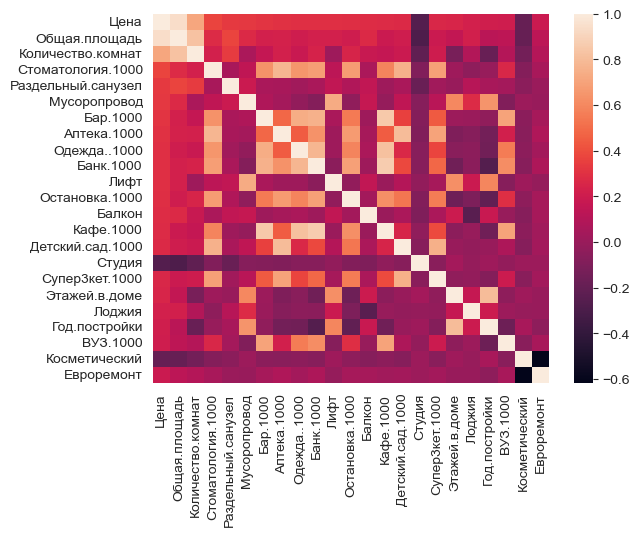

In [174]:
sorted_idx = train_data.corr()[answer].abs().sort_values(ascending=False).index[:23]
corr_matrix = train_data[sorted_idx].corr()
sns.heatmap(corr_matrix)

In [175]:
def show_correlation(names):
    corr_price_df = train_data.corr()[[answer]].transpose()[names]
    sb.heatmap(
    corr_price_df,
    annot=True,
    fmt='.1g',
    vmin=-1,
    vmax=1,
    )
    fig = plt.gcf()
    fig.set_size_inches(35, 5)

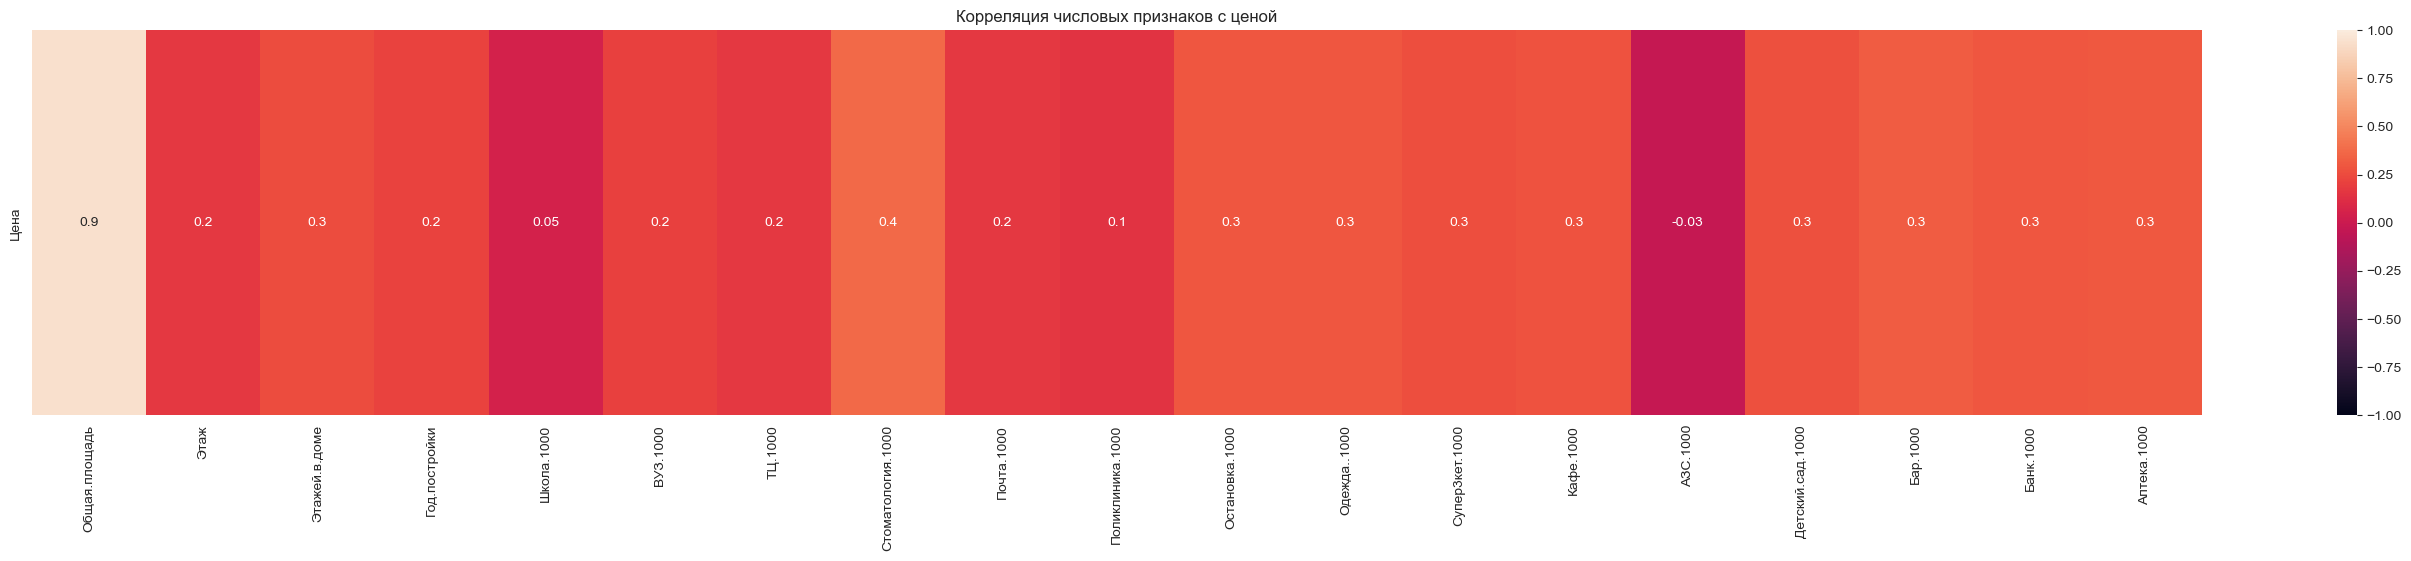

In [176]:
show_correlation(numeric)
plt.title("Корреляция числовых признаков с ценой")
plt.show()

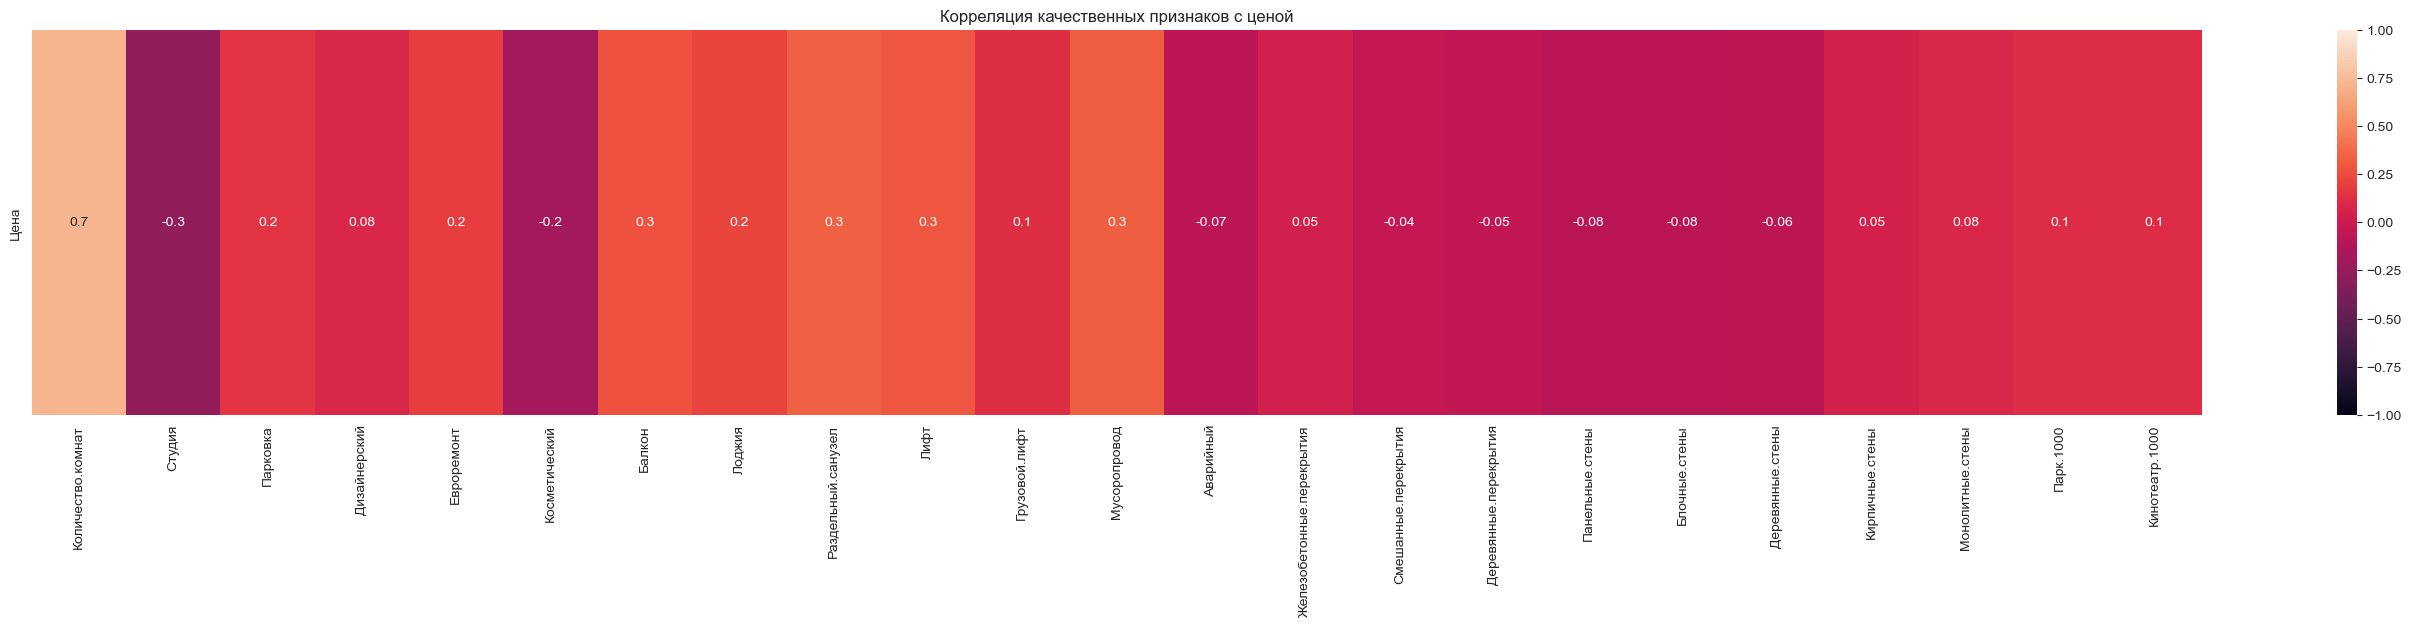

In [177]:
show_correlation(categorical)
plt.title("Корреляция качественных признаков с ценой")
plt.show()

Определим наиболее коррелирующие с ценой признаки

<Axes: >

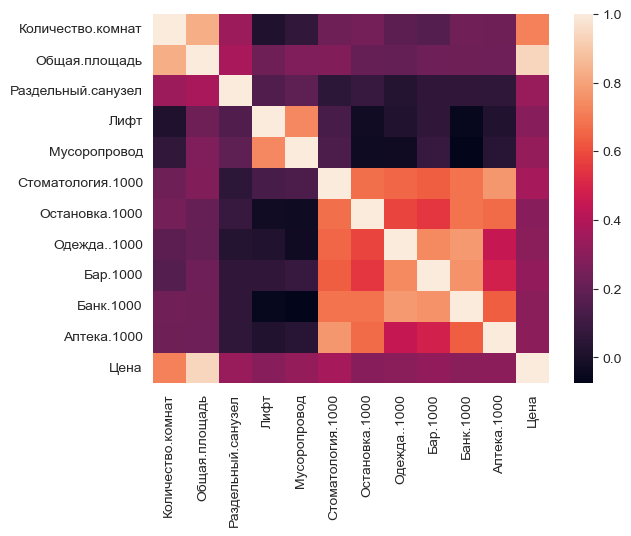

In [178]:
corr_matrix = train_data.corr()
threshold = 0.29
corr_price_matrix = train_data.corrwith(train_data[answer]).abs()
weak_corr_features = set(corr_matrix[corr_price_matrix <= threshold].index)
train_data.drop(weak_corr_features, axis=1, inplace=True)
sns.heatmap(train_data.corr())

Оставим только признаки, меньше всего коррелирующие друг с другом

<Axes: >

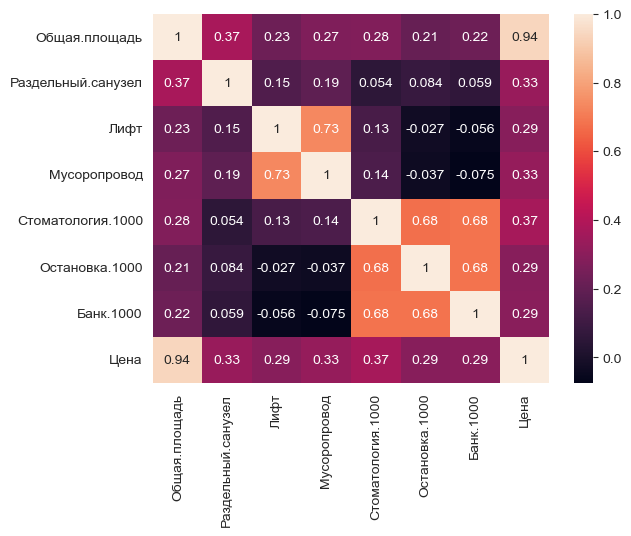

In [179]:
feature_select = train_data.drop(answer, axis=1)
corr_series = feature_select.corr().abs().stack().sort_values()
corr_series = corr_series[~corr_series.duplicated()]
threshold = 0.75
drops = set([feature2 for (feature1, feature2), corr in corr_series.items() if
             corr > threshold and corr != 1])
train_data.drop(drops, axis=1, inplace=True)
sns.heatmap(train_data.corr(), annot=True)

In [180]:
x = train_data.drop(columns=answer, axis=1)
y = train_data[answer]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

## Построение регрессионных моделей

In [181]:
def count_criteria(model, x_test, y_test):
    """
    Вычисляет все виды критериев для данной модели
    @:param model: модель линейной регрессии
    @:return: словарь значений критериев
    """
    y_pred = model.predict(x_test) if hasattr(model, "predict") else model.fit(x_test)[0]

    r_sq = r2_score(y_test, y_pred)

    n, m = x_test.shape
    adj_r_sq = 1 - (1 - r_sq) * (n - 1) / (n - m - 1)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    ll = -0.5 * (n * np.log(2 * np.pi) + n * np.log(
        np.sum(((y_test - y_pred) ** 2)) / n) + n)
    aic = 2 * m - 2 * ll
    bic = m * np.log(n) - 2 * ll

    res = pd.Series({
        "R^2": r_sq,
        "Adj R^2": adj_r_sq,
        "RMSE": rmse,
        "AIC": aic,
        "BIC": bic
    })
    return res

In [182]:
def get_stats_vals(fitted_model, x_test, y_test):
    """
    Вычисляет информацию обо всех коэффициентах модели
    @:param fitted_model: модель для вычисления
    @:return: все параметры коэффициента
    """

    n, p = x_test.shape

    mse = mean_squared_error(y_test, fitted_model.predict(x_test))
    std_errs = np.sqrt(np.diag(np.linalg.inv(np.dot(x_test.T, x_test))) * mse)
    coefs = fitted_model.coef_ if hasattr(fitted_model,
                                          "coef_") else fitted_model.params.values

    t_values = coefs / std_errs
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=n - p - 1))

    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = t.ppf(1 - alpha / 2, n - p - 1)
    conf_intervals = list(
        zip(coefs - t_critical * std_errs, coefs + t_critical * std_errs))
    is_hypothesis_rejected = np.abs(t_values) > t_critical

    data = pd.DataFrame(
        {
            'Name': x_test.columns,
            'Estimate': coefs,
            'Standard Error': std_errs,
            't-value': t_values,
            'p-value': p_values,
            '95% Confidence Interval': conf_intervals,
            'Is hypothesis rejected': is_hypothesis_rejected
        })
    return data

In [183]:
def sk_get_best(unfitted_model, params, x_train, y_train):
    """
    Определяет лучшую skilearn модель с параметрами
    @:param unfitted_model: необученная модель
    @:param params: параметры для обучения модели
    @:return: модель с лучшими параметрами
    """
    grid = GridSearchCV(unfitted_model, params, cv=5,
                        scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)
    return grid.best_estimator_


def sm_get_best(unfitted_model, params):
    """
    Определяет лучшую statmodel модель с параметрами
    @:param unfitted_model: необученная модель
    @:param params: параметры для обучения модели
    @:return: модель с лучшими параметрами
    """
    kfolder = KFold(n_splits=5, shuffle=True)
    param_keys = params.keys()
    fitted = []
    for param in product(*params.values()):
        param_dict = dict(zip(param_keys, param))
        for train_idx, test_idx in kfolder.split(x):
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            cur_model = unfitted_model(y_train, x_train, **param_dict)
            fitted_model = cur_model.fit()
            y_pred = fitted_model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            fitted.append({"model": fitted_model, "score": rmse})
    return min(fitted, key=lambda m_dict: m_dict["score"])["model"]

In [184]:
def show_model(model_name, model, stat_vals):
    print(model_name)
    print(model)
    print(stat_vals)

In [185]:
def build_sk_model(model_name, model_params, list_models):
    """
    :param model_name:
    :param model_params:
    :return:
    """
    model = model_params["model"]
    if model_params["selector"] == "SFS":
        selector = SequentialFeatureSelector(model)
        selector.fit(x_train, y_train)
        features = selector.get_support()
        x_train_sel, x_test_sel = x_train.loc[:, features], x_test.loc[:,
                                                                features]
    # Отдельно обрабатываем случай полиномиальной регрессии
    elif model_params["selector"] == "Poly":
        selector = PolynomialFeatures(degree=2)
        x_train_sel, x_test_sel = selector.fit_transform(
            x_train), selector.fit_transform(x_test)
    else:
        x_train_sel, x_test_sel = x_train, x_test
    fitted_model = sk_get_best(model, model_params["params"], x_train_sel, y_train)
    # Вычисляем критерии
    model_stats = count_criteria(fitted_model, x_test_sel, y_test)
    model_stats["Model name"] = model_name
    list_models = list_models.append(model_stats, ignore_index=True)
    if model_params["selector"] not in ["Poly", "Not parametric"]:
        # Вычисляем информацию о коэффициентах
        coeff = get_stats_vals(fitted_model, x_test_sel, y_test)
    else:
        coeff = "Невозможно получить информацию о коэффициентах"
    show_model(model_name, model_stats, coeff)
    return list_models

In [186]:
def build_sm_model(cur_model_name, cur_model_params, list_models):
    fitted_model = sm_get_best(cur_model_params["model"], cur_model_params["params"])
    model_stats = count_criteria(fitted_model, x_test, y_test)
    model_stats["Model name"] = cur_model_name
    list_models = list_models.append(model_stats, ignore_index=True)
    values = get_stats_vals(fitted_model, x_test, y_test)
    show_model(cur_model_name, model_stats, values)
    return list_models

Создадим фрейм для хранения характеристик модели

In [187]:
list_models = pd.DataFrame(
    {
        "Model name": [],
        "R^2": [],
        "Adj R^2": [],
        "RMSE": [],
        "AIC": [],
        "BIC": []
    }
)

### Линейная регрессия

In [188]:
linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "SFS",
    "kind": "sk"
}
list_models = build_sk_model(
    "Линейная регрессия",
    linear_parameters,
    list_models
)

           Model name       R^2   Adj R^2           RMSE          AIC  \
0  Линейная регрессия  0.892566  0.891217  323082.386868  6860.836169   

           BIC  
0  6871.315353  
Линейная регрессия
R^2                     0.892566
Adj R^2                 0.891217
RMSE               323082.386868
AIC                  6860.836169
BIC                  6871.315353
Model name    Линейная регрессия
dtype: object
                Name      Estimate  Standard Error    t-value       p-value  \
0      Общая.площадь  5.390386e+06    94130.021915  57.265319  0.000000e+00   
1               Лифт  1.476439e+05    39289.425556   3.757854  2.154292e-04   
2  Стоматология.1000  6.987201e+05   124491.528686   5.612591  5.505546e-08   

                   95% Confidence Interval  Is hypothesis rejected  
0    (5204955.27957582, 5575816.158474435)                    True  
1  (70246.15178800371, 225041.72706350716)                    True  
2   (453479.3207132801, 943960.8568377082)                    Tr

### Лассо регрессия

In [189]:
linear_parameters = {
    "model": Lasso(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'positive': [True, False],
        'warm_start': [True, False],
        "selection": ["cyclic", "random"]
    },
    "selector": None,
    "kind": "sk"
}

list_models = build_sk_model(
    "Лассо регрессия",
    linear_parameters,
    list_models
)

           Model name       R^2   Adj R^2           RMSE          AIC  \
0  Линейная регрессия  0.892566  0.891217  323082.386868  6860.836169   
1     Лассо регрессия  0.891594  0.888365  324540.743877  6871.024981   

           BIC  
0  6871.315353  
1  6895.476411  
Лассо регрессия
R^2                  0.891594
Adj R^2              0.888365
RMSE            324540.743877
AIC               6871.024981
BIC               6895.476411
Model name    Лассо регрессия
dtype: object
                 Name      Estimate  Standard Error    t-value   p-value  \
0       Общая.площадь  5.310667e+06   113032.618119  46.983491  0.000000   
1  Раздельный.санузел  0.000000e+00    44105.005514   0.000000  1.000000   
2                Лифт  9.631891e+04    65412.285650   1.472490  0.142227   
3        Мусоропровод  1.222011e+05    69949.942659   1.746980  0.081947   
4   Стоматология.1000  3.175525e+05   199255.232893   1.593697  0.112348   
5      Остановка.1000  3.818369e+05   149367.486023   2.556359 

### Гребневая регрессия

In [190]:
linear_parameters = {
    "model": Ridge(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    },
    "selector": None,
}
list_models = build_sk_model(
    "Гребневая регрессия",
    linear_parameters,
    list_models
)

            Model name       R^2   Adj R^2           RMSE          AIC  \
0   Линейная регрессия  0.892566  0.891217  323082.386868  6860.836169   
1      Лассо регрессия  0.891594  0.888365  324540.743877  6871.024981   
2  Гребневая регрессия  0.891583  0.888353  324557.236371  6871.049678   

           BIC  
0  6871.315353  
1  6895.476411  
2  6895.501108  
Гребневая регрессия
R^2                      0.891583
Adj R^2                  0.888353
RMSE                324557.236371
AIC                   6871.049678
BIC                   6895.501108
Model name    Гребневая регрессия
dtype: object
                 Name      Estimate  Standard Error    t-value   p-value  \
0       Общая.площадь  5.328881e+06   113038.362204  47.142230  0.000000   
1  Раздельный.санузел -4.338653e+04    44107.246840  -0.983660  0.326294   
2                Лифт  9.756408e+04    65415.609768   1.491449  0.137185   
3        Мусоропровод  1.279913e+05    69953.497371   1.829662  0.068567   
4   Стоматология.

### Elastic-Net

In [191]:
linear_parameters = {
    "model": ElasticNet(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8],
        'fit_intercept': [True, False],
    },
    "selector": None,
}
list_models = build_sk_model(
    "Elastic-Net",
    linear_parameters,
    list_models
)

            Model name       R^2   Adj R^2           RMSE          AIC  \
0   Линейная регрессия  0.892566  0.891217  323082.386868  6860.836169   
1      Лассо регрессия  0.891594  0.888365  324540.743877  6871.024981   
2  Гребневая регрессия  0.891583  0.888353  324557.236371  6871.049678   
3          Elastic-Net  0.885632  0.882226  333344.554048  6884.033046   

           BIC  
0  6871.315353  
1  6895.476411  
2  6895.501108  
3  6908.484476  
Elastic-Net
R^2                0.885632
Adj R^2            0.882226
RMSE          333344.554048
AIC             6884.033046
BIC             6908.484476
Model name      Elastic-Net
dtype: object
                 Name      Estimate  Standard Error    t-value   p-value  \
0       Общая.площадь  4.976923e+06   116098.851656  42.867980  0.000000   
1  Раздельный.санузел  2.681255e+03    45301.441104   0.059187  0.952853   
2                Лифт  1.037047e+05    67186.723395   1.543530  0.124048   
3        Мусоропровод  1.502954e+05    71847.4

### Метод наименьших углов

In [192]:
linear_parameters = {
    "model": Lars(),
    "params": {
        'n_nonzero_coefs': [100, 500, 1000],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    "selector": "SFS",
}
list_models = build_sk_model(
    "Метод наименьших углов",
    linear_parameters,
    list_models
)

               Model name       R^2   Adj R^2           RMSE          AIC  \
0      Линейная регрессия  0.892566  0.891217  323082.386868  6860.836169   
1         Лассо регрессия  0.891594  0.888365  324540.743877  6871.024981   
2     Гребневая регрессия  0.891583  0.888353  324557.236371  6871.049678   
3             Elastic-Net  0.885632  0.882226  333344.554048  6884.033046   
4  Метод наименьших углов  0.892566  0.891217  323082.386868  6860.836169   

           BIC  
0  6871.315353  
1  6895.476411  
2  6895.501108  
3  6908.484476  
4  6871.315353  
Метод наименьших углов
R^2                         0.892566
Adj R^2                     0.891217
RMSE                   323082.386868
AIC                      6860.836169
BIC                      6871.315353
Model name    Метод наименьших углов
dtype: object
                Name      Estimate  Standard Error    t-value       p-value  \
0      Общая.площадь  5.390386e+06    94130.021915  57.265319  0.000000e+00   
1               Ли

### Байесовская регрессия

In [193]:
linear_parameters = {
    "model": BayesianRidge(),
    "params": {
        'n_iter': [100, 300, 500],
        'tol': [1e-3, 1e-4, 1e-5],
    },
    "selector": None,
}
list_models = build_sk_model(
    "Байесовская регрессия",
    linear_parameters,
    list_models
)

               Model name       R^2   Adj R^2          RMSE          AIC  \
0      Линейная регрессия  0.892566  0.891217  3.230824e+05  6860.836169   
1         Лассо регрессия  0.891594  0.888365  3.245407e+05  6871.024981   
2     Гребневая регрессия  0.891583  0.888353  3.245572e+05  6871.049678   
3             Elastic-Net  0.885632  0.882226  3.333446e+05  6884.033046   
4  Метод наименьших углов  0.892566  0.891217  3.230824e+05  6860.836169   
5   Байесовская регрессия -0.031111 -0.061825  1.000909e+06  7418.383912   

           BIC  
0  6871.315353  
1  6895.476411  
2  6895.501108  
3  6908.484476  
4  6871.315353  
5  7442.835342  
Байесовская регрессия
R^2                       -0.031111
Adj R^2                   -0.061825
RMSE                 1000909.165779
AIC                     7418.383912
BIC                     7442.835342
Model name    Байесовская регрессия
dtype: object
                 Name  Estimate  Standard Error       t-value  p-value  \
0       Общая.площадь 

### Обобщённый МНК
Обобщенная линейная регрессия (обобщенный МНК) - это метод, который расширяет линейную регрессию на случаи, когда зависимая переменная имеет не нормальное распределение или связана с независимыми переменными нелинейно.

In [194]:
linear_parameters = {
    "model": sm.GLS,
    "params": {
        'sigma': [0.1, 0.5, 1.0],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine'],
        'dew': [False, True]
    },
}
list_models = build_sm_model(
    "Обобщённая линейная регрессия",
    linear_parameters,
    list_models
)

Обобщённая линейная регрессия
R^2                                0.874559
Adj R^2                            0.870822
RMSE                          349110.148848
AIC                             6906.491511
BIC                             6930.942941
Model name    Обобщённая линейная регрессия
dtype: object
                 Name      Estimate  Standard Error    t-value       p-value  \
0       Общая.площадь  5.878212e+06   121589.769175  48.344625  0.000000e+00   
1  Раздельный.санузел -5.082089e+04    47443.981474  -1.071177  2.851889e-01   
2                Лифт  1.333476e+05    70364.332401   1.895103  5.930618e-02   
3        Мусоропровод  1.499507e+05    75245.513404   1.992819  4.743802e-02   
4   Стоматология.1000  1.279087e+05   214339.879742   0.596757  5.512443e-01   
5      Остановка.1000  9.097922e+05   160675.373624   5.662300  4.338572e-08   
6           Банк.1000  5.748314e+04   237554.995406   0.241978  8.090081e-01   

                     95% Confidence Interval  Is hy

### Взвешенный МНК
Дает разные веса наблюдениям в зависимости от их точности или важности. Минимизирует сумму взвешенных квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [195]:
linear_parameters = {
    "model": sm.WLS,
    "params": {
        'missing': ['none', 'drop', 'raise'],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine']
    },
}
list_models = build_sm_model(
    "Взвешенный МНК",
    linear_parameters,
    list_models
)

Взвешенный МНК
R^2                 0.874765
Adj R^2             0.871035
RMSE           348822.451456
AIC              6906.090839
BIC              6930.542269
Model name    Взвешенный МНК
dtype: object
                 Name      Estimate  Standard Error    t-value       p-value  \
0       Общая.площадь  5.810701e+06   121489.568538  47.828803  0.000000e+00   
1  Раздельный.санузел -2.203656e+04    47404.883471  -0.464858  6.424633e-01   
2                Лифт  1.442531e+05    70306.346017   2.051779  4.129965e-02   
3        Мусоропровод  1.512699e+05    75183.504499   2.012009  4.536044e-02   
4   Стоматология.1000  1.929182e+05   214163.244875   0.900800  3.686170e-01   
5      Остановка.1000  8.518524e+05   160542.963019   5.306071  2.587349e-07   
6           Банк.1000  9.142525e+04   237359.229248   0.385177  7.004549e-01   

                   95% Confidence Interval  Is hypothesis rejected  
0   (5571352.850163871, 6050048.493037425)                    True  
1  (-115429.393747

### Полиномиальная регрессия
Зависимость между независимой переменной x и зависимой переменной y моделируется как полином n-й степени в x. Полиномиальная регрессия может быть использована для аппроксимации нелинейных данных и изучения сложных и изогнутых зависимостей.

In [196]:
linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "Poly",
}
# model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
list_models = build_sk_model(
    "Полиномиальная регрессия",
    linear_parameters,
    list_models
)

                      Model name       R^2   Adj R^2          RMSE  \
0             Линейная регрессия  0.892566  0.891217  3.230824e+05   
1                Лассо регрессия  0.891594  0.888365  3.245407e+05   
2            Гребневая регрессия  0.891583  0.888353  3.245572e+05   
3                    Elastic-Net  0.885632  0.882226  3.333446e+05   
4         Метод наименьших углов  0.892566  0.891217  3.230824e+05   
5          Байесовская регрессия -0.031111 -0.061825  1.000909e+06   
6  Обобщённая линейная регрессия  0.874559  0.870822  3.491101e+05   
7                 Взвешенный МНК  0.874765  0.871035  3.488225e+05   
8       Полиномиальная регрессия  0.893461  0.874843  3.217332e+05   

           AIC          BIC  
0  6860.836169  6871.315353  
1  6871.024981  6895.476411  
2  6871.049678  6895.501108  
3  6884.033046  6908.484476  
4  6860.836169  6871.315353  
5  7418.383912  7442.835342  
6  6906.491511  6930.942941  
7  6906.090839  6930.542269  
8  6924.802355  7050.552567  

### Непараметрическая регрессия
Регрессия ближайших соседей

In [197]:
linear_parameters = {
    "model": KNeighborsRegressor(),
    "params": {
        "n_neighbors": [2, 3, 4, 5, 6],
    },
    "selector": "Not parametric"
}
list_models = build_sk_model(
    "Непараметрическая регрессия",
    linear_parameters,
    list_models
)

                      Model name       R^2   Adj R^2          RMSE  \
0             Линейная регрессия  0.892566  0.891217  3.230824e+05   
1                Лассо регрессия  0.891594  0.888365  3.245407e+05   
2            Гребневая регрессия  0.891583  0.888353  3.245572e+05   
3                    Elastic-Net  0.885632  0.882226  3.333446e+05   
4         Метод наименьших углов  0.892566  0.891217  3.230824e+05   
5          Байесовская регрессия -0.031111 -0.061825  1.000909e+06   
6  Обобщённая линейная регрессия  0.874559  0.870822  3.491101e+05   
7                 Взвешенный МНК  0.874765  0.871035  3.488225e+05   
8       Полиномиальная регрессия  0.893461  0.874843  3.217332e+05   
9    Непараметрическая регрессия  0.716178  0.707724  5.251279e+05   

           AIC          BIC  
0  6860.836169  6871.315353  
1  6871.024981  6895.476411  
2  6871.049678  6895.501108  
3  6884.033046  6908.484476  
4  6860.836169  6871.315353  
5  7418.383912  7442.835342  
6  6906.491511  693

Ядерная регрессия

In [198]:
#kernel_model = sm.nonparametric.KernelReg(y_train, x_train, var_type="".join(
    #["c" if len(x_train[col].value_counts()) > 2 else "u" for col in
     #x_train.columns]))
#kernel_stats = count_criteria(kernel_model, x_test, y_test)
#kernel_stats["Model name"] = "Ядерная регрессия"
#list_models.append(kernel_stats)
#show_model("Ядерная регрессия", kernel_stats, "Невозможно получить информацию о коэффициентах")

## Сравнение регрессионных моделей

In [199]:
print(list_models)

                      Model name       R^2   Adj R^2          RMSE  \
0             Линейная регрессия  0.892566  0.891217  3.230824e+05   
1                Лассо регрессия  0.891594  0.888365  3.245407e+05   
2            Гребневая регрессия  0.891583  0.888353  3.245572e+05   
3                    Elastic-Net  0.885632  0.882226  3.333446e+05   
4         Метод наименьших углов  0.892566  0.891217  3.230824e+05   
5          Байесовская регрессия -0.031111 -0.061825  1.000909e+06   
6  Обобщённая линейная регрессия  0.874559  0.870822  3.491101e+05   
7                 Взвешенный МНК  0.874765  0.871035  3.488225e+05   
8       Полиномиальная регрессия  0.893461  0.874843  3.217332e+05   
9    Непараметрическая регрессия  0.716178  0.707724  5.251279e+05   

           AIC          BIC  
0  6860.836169  6871.315353  
1  6871.024981  6895.476411  
2  6871.049678  6895.501108  
3  6884.033046  6908.484476  
4  6860.836169  6871.315353  
5  7418.383912  7442.835342  
6  6906.491511  693

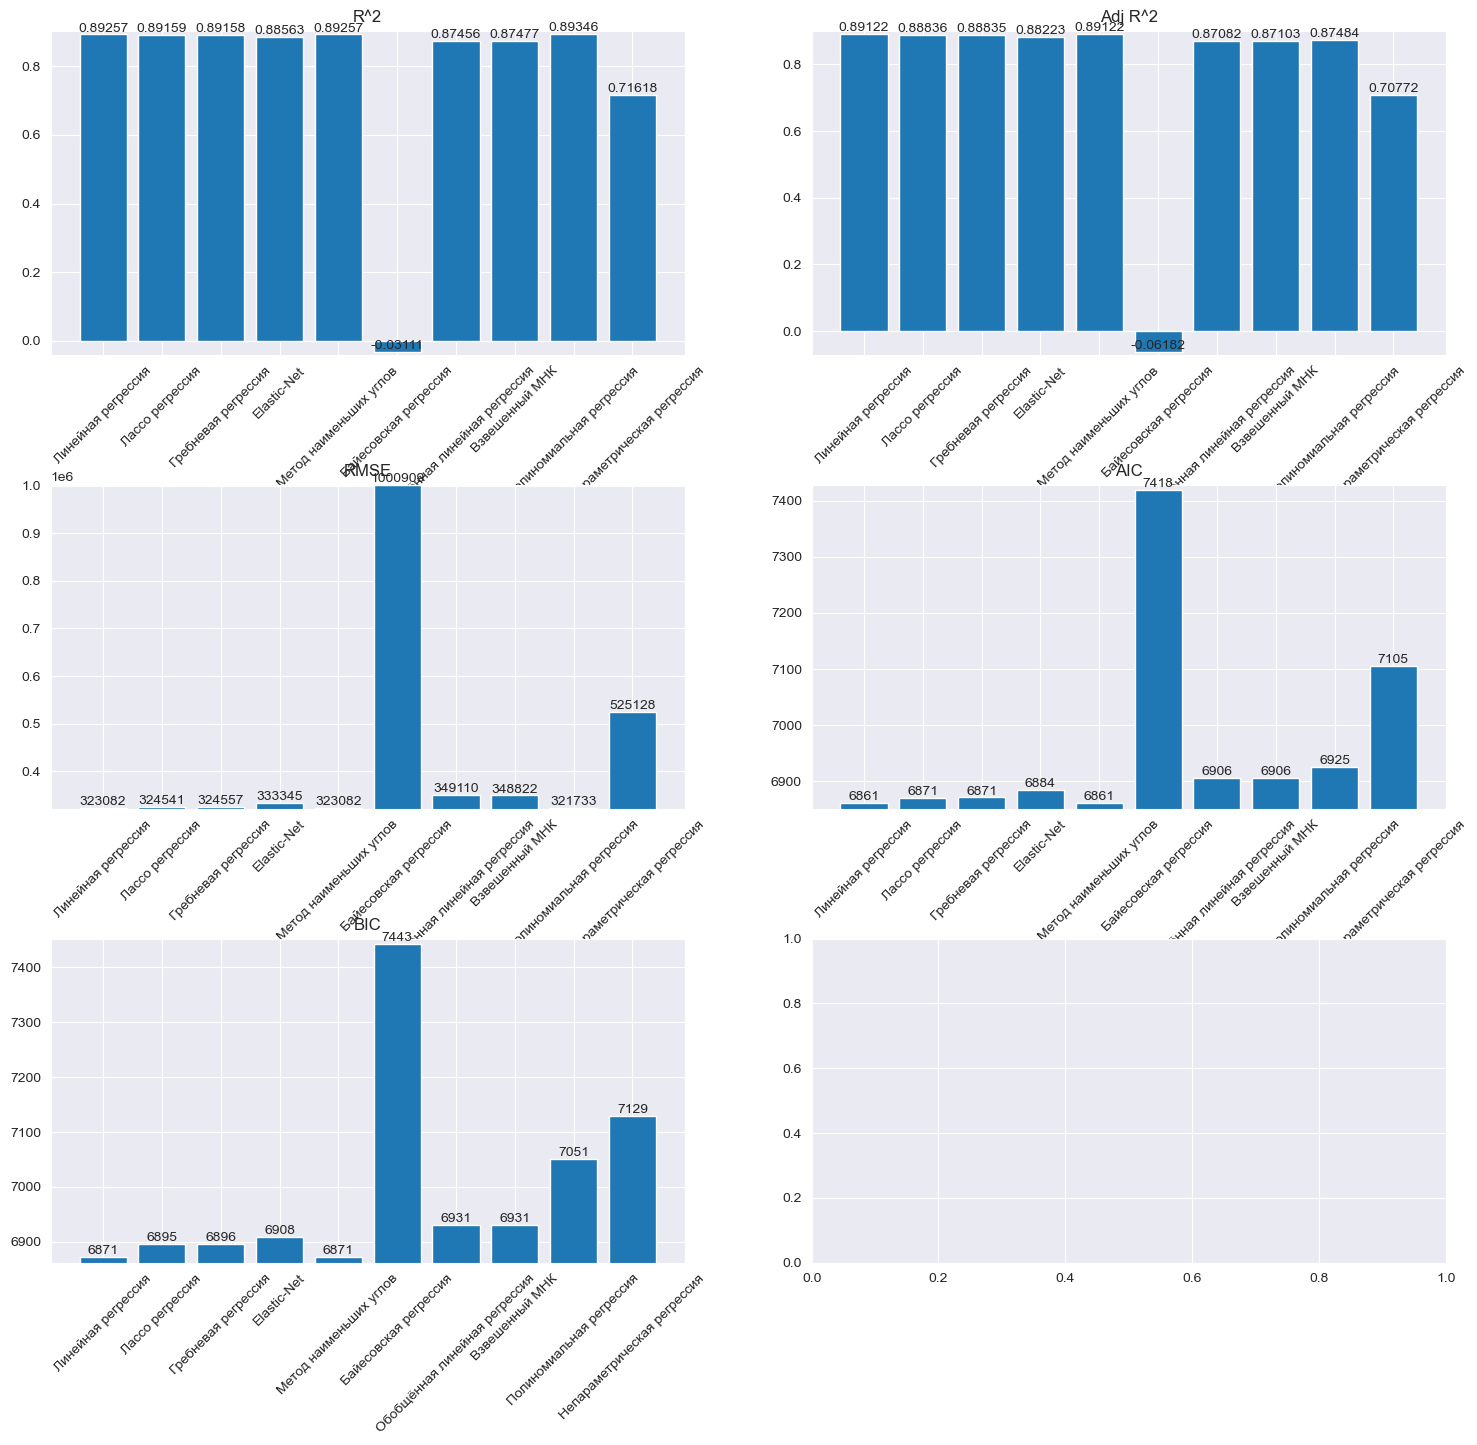

In [200]:
ylims = {
    "R^2": [min(list_models["R^2"]) - 0.01, max(list_models["R^2"]) + 0.01],
    "Adj R^2": [min(list_models["Adj R^2"]) - 0.01, max(list_models["Adj R^2"]) + 0.01],
    "RMSE": [min(list_models["RMSE"]) - 1000, max(list_models["RMSE"]) + 1000],
    "AIC": [min(list_models["AIC"]) - 10, max(list_models["AIC"]) + 10],
    "BIC": [min(list_models["BIC"]) - 10, max(list_models["BIC"]) + 10],
}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
fig.subplots_adjust(hspace=0.4)

for ax, comb in zip(axs.flatten(),
                    product(["Model name"], list_models.columns.tolist()[1:])):
    model_names, cur_stat = comb
    to_plot = list_models[list(comb)]
    title = cur_stat
    ax.set_ylim(ylims[title])
    ax.set_title(title)

    ax.bar(list_models[model_names], list_models[cur_stat])
    ax.set_xticklabels(list(to_plot[model_names]), rotation=45)

    for i, val in enumerate(to_plot[cur_stat]):
        ax.text(i, val, str(round(val, 5 if val < 1 else None)), ha='center',
                va='bottom')

In [201]:
def compare_models(lst_models: list, index: int, param: dict) -> None:
    """Построение графиков для сравнения моделей."""
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(
        list(map(lambda x: x[0], lst_models)),
        list(map(lambda x: x[index], lst_models)),
        )
    ax.bar_label(
        ax.containers[0],
        label_type='edge',
        padding=3,
        fontsize=18,
    )
    plt.ylabel('Value', fontsize=18)
    plt.title(param, fontsize=18)
    plt.xticks(fontsize=14, rotation=90)
    plt.show()

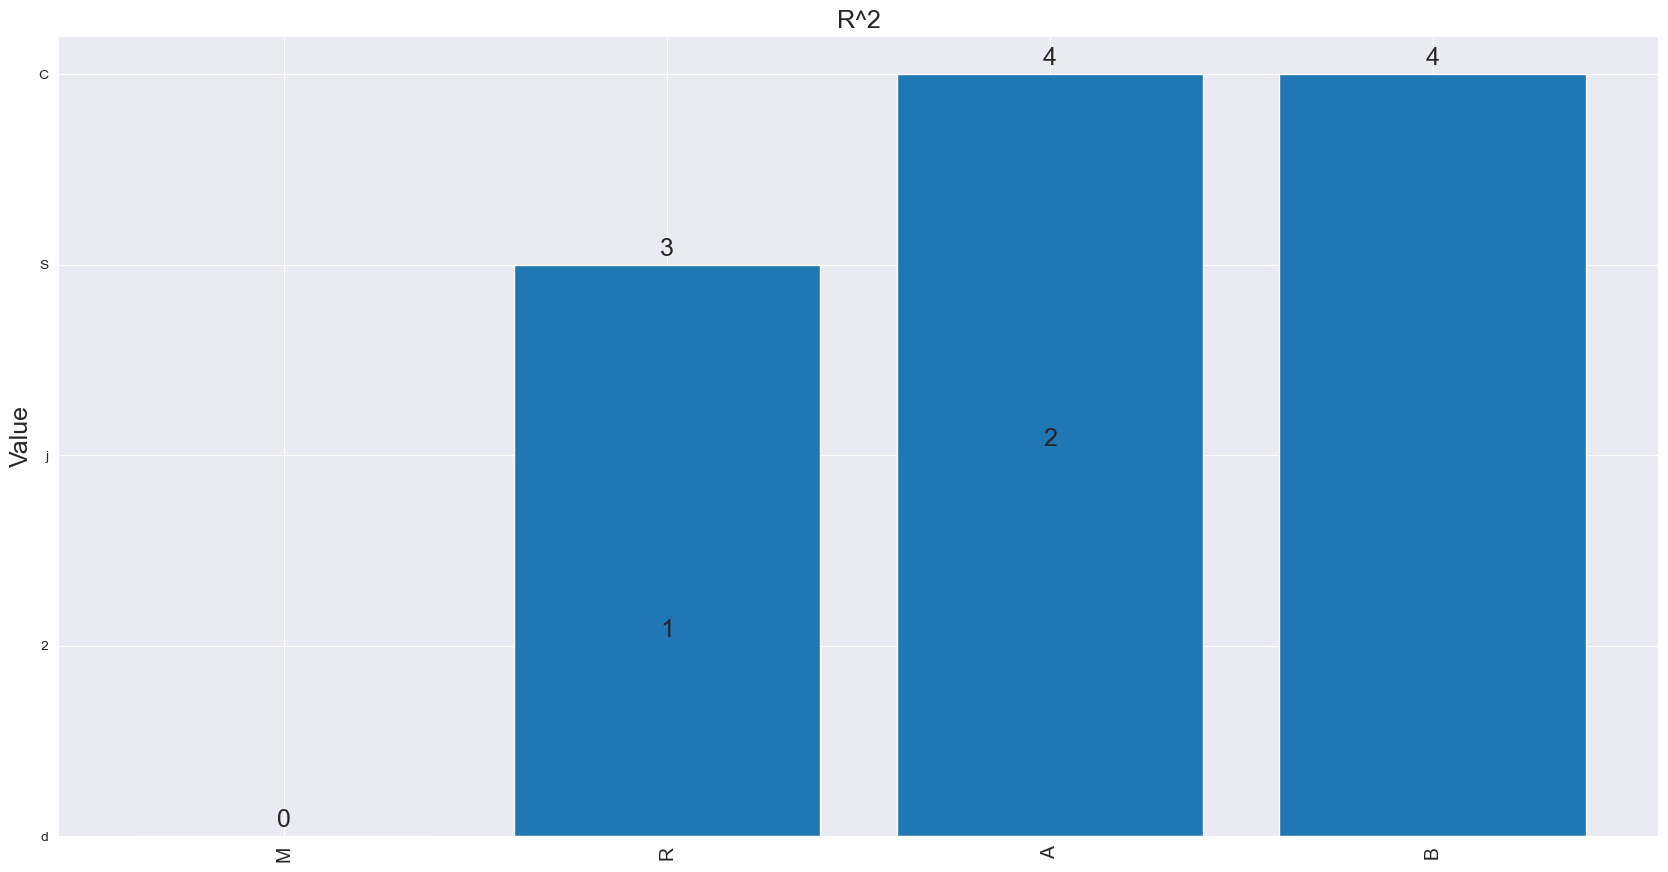

IndexError: string index out of range

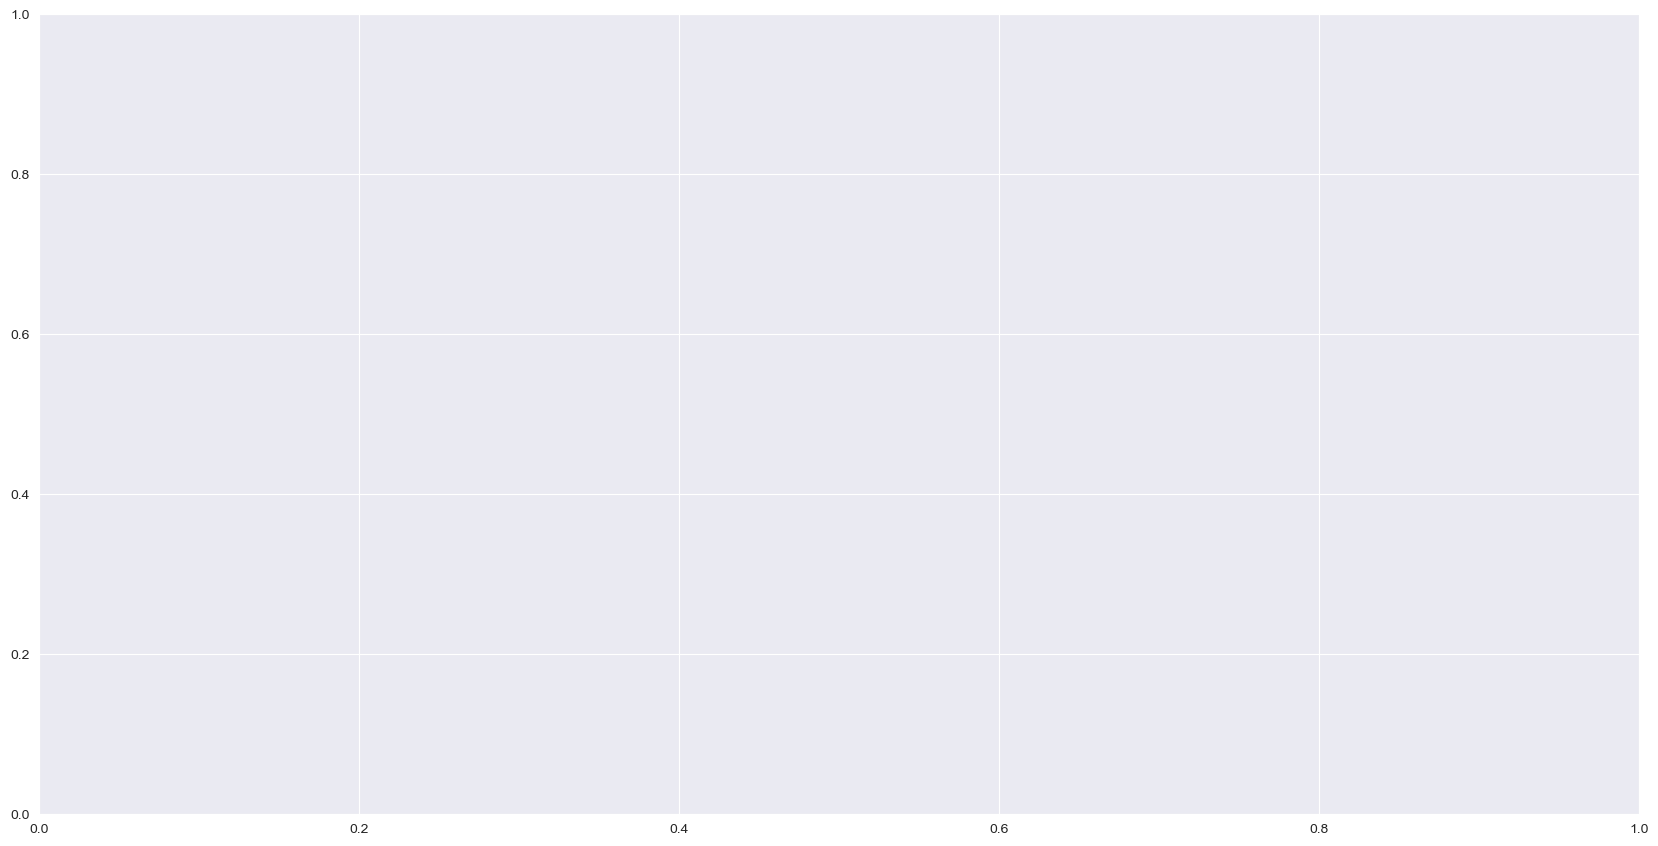

In [202]:
list_criterion = ["R^2", "Adj R^2", "RMSE", "AIC", "BIC"]
for criterion in list_criterion:
    compare_models(
        list_models,
        list_criterion.index(criterion) + 2,
        criterion,
    )

In [ ]:
def create_submission(id_col, y_pred) -> pd.DataFrame:
    """Создание итоговой выборки."""
    submission = pd.DataFrame({
        "id": id_col,
        "Цена": y_pred,
    })
    return submission

In [ ]:
y_test_predicted = list_models[0][1].predict(test_data)
sub = create_submission(
    ids,
    list(item for item in y_test_predicted.tolist()),
)
sub.to_csv("../data/sub.csv", index=False)